In [11]:
# !pip install -q tensorflow tensorflow-datasets

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os, glob
from PIL import Image
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

In [2]:
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")
    
    print(len(images), " images to be resized.")
    # 28 x 28 size
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images), " images resized.")

image_dir_path = os.getenv("HOME") + "/Deepfake Detection/AIFFEL/Exploration 1/rock_scissor_paper/*/*"
resize_images(image_dir_path)

print("completed!")

5489  images to be resized.
5489  images resized.
completed!


In [16]:
def load_data(img_path, number_of_data=5489):
    # rock : 0, paper : 1, scissors : 2
    img_size = 28
    color = 3
    
    imgs = np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels = np.zeros(number_of_data, dtype=np.int32)
    
    idx = 0
    for file in glob.iglob(img_path + '/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:] = img # [idx, :, :, 0] -> gray scale
        labels[idx] = 2 # scissor : 2
        idx = idx + 1
        
    for file in glob.iglob(img_path + '/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:] = img
        labels[idx] = 0 # rock : 0
        idx = idx + 1
        
    for file in glob.iglob(img_path + '/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:] = img
        labels[idx] = 1 # paper : 1
        idx = idx + 1
        
    print("the number of x_train is ", idx)
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/Deepfake Detection/AIFFEL/Exploration 1/rock_scissor_paper/*"
(x_train, y_train) = load_data(image_dir_path)
x_train_norm = x_train/255.0 # 0 ~ 1 normalization

print("x_train shape : {}".format(x_train.shape))
print("y_train shape : {}".format(y_train.shape))

the number of x_train is  5489
x_train shape : (5489, 28, 28, 3)
y_train shape : (5489,)


label : 2


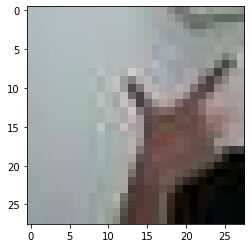

In [17]:
plt.imshow(x_train[0])
print('label :', y_train[0])

In [20]:
tf.random.set_seed(1234)
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)               

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_norm, y_train, epochs=5)

Train on 5489 samples
Epoch 1/5
5489/5489 [==============================] - 1s 185us/sample - loss: 1.0077 - accuracy: 0.4704
Epoch 2/5
5489/5489 [==============================] - 1s 116us/sample - loss: 0.5668 - accuracy: 0.7672
Epoch 3/5
5489/5489 [==============================] - 1s 117us/sample - loss: 0.3254 - accuracy: 0.8803
Epoch 4/5
5489/5489 [==============================] - 1s 102us/sample - loss: 0.2049 - accuracy: 0.9288
Epoch 5/5
5489/5489 [==============================] - 1s 109us/sample - loss: 0.1318 - accuracy: 0.9594


In [12]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'd4rl_adroit_door',
 'd4rl_adroit_hammer',
 'd4rl_adroit_pen',
 'd4rl_adroit_relocate',
 'd4rl_mujoco_ant',
 'd4

In [13]:
builder = tfds.builder('rock_paper_scissors')
info = builder.info

info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_path='/home/ubuntu/tensorflow_datasets/rock_paper_scissors/3.0.0',
    download_size=219.53 MiB,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
)

In [14]:
ds_train = tfds.load(name='rock_paper_scissors', split='train')
ds_test = tfds.load(name='rock_paper_scissors', split='test')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/2520 [00:00<?, ? examples/s]

Shuffling rock_paper_scissors-train.tfrecord...:   0%|          | 0/2520 [00:00<?, ? examples/s]

Generating test examples...:   0%|          | 0/372 [00:00<?, ? examples/s]

Shuffling rock_paper_scissors-test.tfrecord...:   0%|          | 0/372 [00:00<?, ? examples/s]

Dataset rock_paper_scissors downloaded and prepared to /home/ubuntu/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


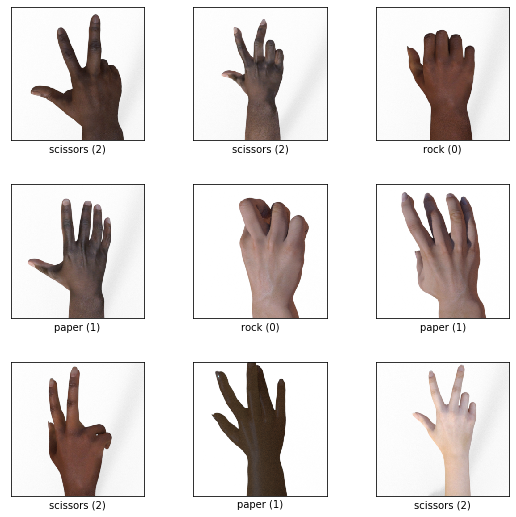

In [15]:
fig = tfds.show_examples(info, ds_train)

In [24]:
train_images = np.array([example['image'].numpy() for example in ds_train]) # .numpy()[:,:,0] - gray scale
train_labels = np.array([example['label'].numpy() for example in ds_train])

test_images = np.array([example['image'].numpy() for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test])

In [25]:
type(train_images[0])
train_images.shape
test_images.shape

(372, 300, 300, 3)

In [27]:
# train_images = train_images.reshape(2520, 28, 28, 3)
# test_images = train_images.reshape(372, 28, 28, 3)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255.
test_images /= 255.

In [29]:
train_images = tf.image.resize(train_images, [28, 28])
test_images = tf.image.resize(test_images, [28, 28])

In [31]:
# evaluate test_images
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print("test_loss: {}".format(test_loss))
print("test_acc: {}".format(test_accuracy))

372/372 - 0s - loss: 4.1295 - accuracy: 0.7339
test_loss: 4.1295471088860625
test_acc: 0.7338709831237793


# Additional Training

In [32]:
model.fit(train_images, train_labels, epochs=10)

Train on 2520 samples
Epoch 1/10
2520/2520 [==============================] - 1s 247us/sample - loss: 0.6082 - accuracy: 0.9190
Epoch 2/10
2520/2520 [==============================] - 0s 123us/sample - loss: 0.0206 - accuracy: 0.9921
Epoch 3/10
2520/2520 [==============================] - 0s 134us/sample - loss: 0.0049 - accuracy: 0.9992
Epoch 4/10
2520/2520 [==============================] - 0s 103us/sample - loss: 0.0024 - accuracy: 0.9996
Epoch 5/10
2520/2520 [==============================] - 0s 128us/sample - loss: 0.0013 - accuracy: 1.0000
Epoch 6/10
2520/2520 [==============================] - 0s 112us/sample - loss: 8.9856e-04 - accuracy: 1.0000
Epoch 7/10
2520/2520 [==============================] - 0s 109us/sample - loss: 6.7016e-04 - accuracy: 1.0000
Epoch 8/10
2520/2520 [==============================] - 0s 131us/sample - loss: 4.7428e-04 - accuracy: 1.0000
Epoch 9/10
2520/2520 [==============================] - 0s 114us/sample - loss: 3.6630e-04 - accuracy: 1.0000
Epoch 10

In [33]:
# evaluate test_images
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print("test_loss: {}".format(test_loss))
print("test_acc: {}".format(test_accuracy))

372/372 - 0s - loss: 0.6361 - accuracy: 0.8468
test_loss: 0.6361180178580745
test_acc: 0.8467742204666138
